#ICP 7 Q1
Using Dataset 20newsgroups from sklearn

In [ ]:
#Importing libraries and dataset
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import matplotlib.pyplot as plt

##Dataset Loading
https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html 

In [ ]:
#Get training data
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [ ]:
#printing first lines of the loaded file
print("\n".join(twenty_train.data[0].split("\n")[:3]))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


In [ ]:
#print the target
print(twenty_train.target_names[twenty_train.target[0]])

rec.autos


In [ ]:
#print category names
categories = twenty_train.target_names
print(categories)
print(len(categories))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
20


##Extracting Features from Text files

Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors:

In [ ]:
#fit transform training data with CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

**fit method** - fit our estimator to the data

**transform method** - transform our count-matrix to a tf-idf representation.

We can use fit_transform to achieve this!

In [ ]:
#fit transform using Term Frequency - Inverse Document Frequency TF-IDF vector
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

##Using SVM and KNN

Evaluation of the algorithms performance on the test set

In [ ]:
#get the test data set
twenty_test = fetch_20newsgroups(subset='test',
    categories=categories, shuffle=True)
docs_test = twenty_test.data

###1a) SVM algorithm

accuracy: 85%

In [ ]:
from sklearn.linear_model import SGDClassifier
#Linear classifier (SVM) with SGD training
#This implementation works with data represented as dense or sparse arrays of floating point values for the features. 
#The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

#build the pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
    ])

#fit the training data and target
text_clf.fit(twenty_train.data, twenty_train.target)

#predict
predicted = text_clf.predict(docs_test)
#get accuracies
acc_svc = round(np.mean(predicted == twenty_test.target)*100, 2)
print("svm accuracy is:", acc_svc)

svm accuracy is: 85.37


In [ ]:
from sklearn import metrics
#Print classification report
print(metrics.classification_report(twenty_test.target, predicted,
    target_names=twenty_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.78      0.79       319
           comp.graphics       0.77      0.78      0.78       389
 comp.os.ms-windows.misc       0.75      0.74      0.74       394
comp.sys.ibm.pc.hardware       0.73      0.76      0.74       392
   comp.sys.mac.hardware       0.84      0.86      0.85       385
          comp.windows.x       0.87      0.76      0.81       395
            misc.forsale       0.84      0.91      0.87       390
               rec.autos       0.93      0.91      0.92       396
         rec.motorcycles       0.95      0.95      0.95       398
      rec.sport.baseball       0.91      0.96      0.93       397
        rec.sport.hockey       0.96      0.98      0.97       399
               sci.crypt       0.91      0.95      0.93       396
         sci.electronics       0.84      0.78      0.81       393
                 sci.med       0.90      0.88      0.89       396
         

###1b) KNeighborsClassifier

accuracy: 65%

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#build the pipeline using KNN
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier()),
    ])

#fit the data
text_clf.fit(twenty_train.data, twenty_train.target)
#predict
predicted = text_clf.predict(docs_test)
#get accuracy scores
acc_knn = round(np.mean(predicted == twenty_test.target)*100, 2)
print("KNN accuracy is:", acc_knn)

KNN accuracy is: 65.92


In [ ]:
from sklearn import metrics
#Get classification report
print(metrics.classification_report(twenty_test.target, predicted,
    target_names=twenty_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.43      0.76      0.55       319
           comp.graphics       0.50      0.61      0.55       389
 comp.os.ms-windows.misc       0.56      0.57      0.57       394
comp.sys.ibm.pc.hardware       0.53      0.58      0.56       392
   comp.sys.mac.hardware       0.59      0.56      0.57       385
          comp.windows.x       0.69      0.60      0.64       395
            misc.forsale       0.58      0.45      0.51       390
               rec.autos       0.75      0.69      0.72       396
         rec.motorcycles       0.84      0.81      0.82       398
      rec.sport.baseball       0.77      0.72      0.74       397
        rec.sport.hockey       0.85      0.84      0.84       399
               sci.crypt       0.76      0.84      0.80       396
         sci.electronics       0.70      0.50      0.58       393
                 sci.med       0.82      0.49      0.62       396
         

##1d) Set tfidf vectorizer to use bigram

https://www.geeksforgeeks.org/tf-idf-for-bigrams-trigrams/

https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

Classifier: KNN

accuracy: 59%

In [ ]:
#Set vectorizer to use bigram
tfidf_Vect = TfidfVectorizer(ngram_range = (2, 2))
#fit-transform the train data
X_train_tfidf = tfidf_Vect.fit_transform(twenty_train.data)

In [ ]:
#use KNN
clf = KNeighborsClassifier()
#fit the train data and target
clf.fit(X_train_tfidf, twenty_train.target)

KNeighborsClassifier()

In [ ]:
#get the test data
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

In [ ]:
#transform the data to get the X_test
X_test_tfidf = tfidf_Vect.transform(twenty_test.data)

In [ ]:
#predict
predicted = clf.predict(X_test_tfidf)
#Get the accuracy
score = metrics.accuracy_score(twenty_test.target, predicted)
print(score)

0.5973181093998938


##1e) Set tfidf vectorizer arguments to use stop_words='english'

classifier: KNN

accuracy: 67%

In [ ]:
#set vectorizer to use stop_words='english'
tfidf_Vect = TfidfVectorizer(stop_words='english')
#get X_train
X_train_tfidf = tfidf_Vect.fit_transform(twenty_train.data)

In [ ]:
#use KNN
clf = KNeighborsClassifier()
#fit the data
clf.fit(X_train_tfidf, twenty_train.target)

KNeighborsClassifier()

In [ ]:
#get test data
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

In [ ]:
#get X_test
X_test_tfidf = tfidf_Vect.transform(twenty_test.data)

In [ ]:
#predict
predicted = clf.predict(X_test_tfidf)
#get accuracies
score = metrics.accuracy_score(twenty_test.target, predicted)
print(score)

0.6757833244822092


##ICP 7 Q2


### Import Dependencies & Libraries

In [ ]:
import nltk
import requests
from bs4 import BeautifulSoup
nltk.download('brown') 
nltk.download('punkt') 
nltk.download('tagset')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer

from nltk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')

from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error loading tagset: Package 'tagset' not found in index
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Get paragraphs from the fox and crow story
Using BeautifulSoup, we can get paragraphs as a list. We need to use the .text tag to avoid adding \<p><\p> tags to our list.

In [ ]:
#get link we're gonna parse through
html = requests.get("https://www.storynory.com/fox-and-the-crow/")


#set up the html parser
htmlParse = BeautifulSoup(html.content, "html.parser")

#initialize list to store paragraphs
fox_crow = []
#loop through document to get paragraphs
for para in htmlParse.find_all("p"):
    fox_crow.append(para.text)

#discard the last 5 paragraphs (legal material)
fox_crow = fox_crow [:-5]
fox_crow

['I bet you can’t guess what I like to eat best of all? Yes, I knew that you would say that foxes like to eat hens best, and stolen ones at that. I don’t mind admitting that I wouldn’t ever say no to a nice fat chicken wing once in a while. But not many people know that what foxes appreciate even more than chicken, is a nice piece of cheese once in a while.',
 'Well today I ate a wonderfully rich and creamy slice of cheddar for my breakfast. It was kindly given to me by a beautiful black-feathered bird whose voice is even more wonderful than her looks. No, I don’t mean a sky-lark, or a fancy bird of paradise. I’m talking about Miss Crow, up in that tree.',
 'It was a fine bright morning, and I was following my sharp nose through the woods in search of a bite to eat, when I caught a cheesy smell on the breeze. I looked up into the tree and there on the branch I saw Miss Crow, looking terribly pleased with herself, for in her beak she held a large piece of cheese. It was stolen, no doubt

Transform our list of strings into 1 coherent paragraph using a join method

In [ ]:
fox_crow_string = ' '.join(fox_crow)
fox_crow_string

'I bet you can’t guess what I like to eat best of all? Yes, I knew that you would say that foxes like to eat hens best, and stolen ones at that. I don’t mind admitting that I wouldn’t ever say no to a nice fat chicken wing once in a while. But not many people know that what foxes appreciate even more than chicken, is a nice piece of cheese once in a while. Well today I ate a wonderfully rich and creamy slice of cheddar for my breakfast. It was kindly given to me by a beautiful black-feathered bird whose voice is even more wonderful than her looks. No, I don’t mean a sky-lark, or a fancy bird of paradise. I’m talking about Miss Crow, up in that tree. It was a fine bright morning, and I was following my sharp nose through the woods in search of a bite to eat, when I caught a cheesy smell on the breeze. I looked up into the tree and there on the branch I saw Miss Crow, looking terribly pleased with herself, for in her beak she held a large piece of cheese. It was stolen, no doubt, from th

### Sentence Tokenization
We use the sent_tokenize method to split our long string into a list where each element is 1 sentence

In [ ]:
# Tokenize by sentence
fox_crow_sent = sent_tokenize(fox_crow_string)

print(fox_crow_sent)

['I bet you can’t guess what I like to eat best of all?', 'Yes, I knew that you would say that foxes like to eat hens best, and stolen ones at that.', 'I don’t mind admitting that I wouldn’t ever say no to a nice fat chicken wing once in a while.', 'But not many people know that what foxes appreciate even more than chicken, is a nice piece of cheese once in a while.', 'Well today I ate a wonderfully rich and creamy slice of cheddar for my breakfast.', 'It was kindly given to me by a beautiful black-feathered bird whose voice is even more wonderful than her looks.', 'No, I don’t mean a sky-lark, or a fancy bird of paradise.', 'I’m talking about Miss Crow, up in that tree.', 'It was a fine bright morning, and I was following my sharp nose through the woods in search of a bite to eat, when I caught a cheesy smell on the breeze.', 'I looked up into the tree and there on the branch I saw Miss Crow, looking terribly pleased with herself, for in her beak she held a large piece of cheese.', 'I

### Word Tokenization & POS Tagging
We use the word_tokenize method to split our long string into a list where each element is 1 word.

We then use the pos_tag method to add tags to each word.

We also remove the punctuation

In [ ]:
# Tokenize by word
fox_crow_words = word_tokenize(fox_crow_string)

# Empty list to store words:
temp_no_punc = []

# Removing punctuation marks :
for w in fox_crow_words:
    if w.isalpha():
        temp_no_punc.append(w)

# Set the word list
fox_crow_words = temp_no_punc

# Get the POS tags for each word
fox_crow_tagged = nltk.pos_tag(fox_crow_words)
print(fox_crow_tagged)

[('I', 'PRP'), ('bet', 'VBP'), ('you', 'PRP'), ('can', 'MD'), ('t', 'VB'), ('guess', 'VB'), ('what', 'WP'), ('I', 'PRP'), ('like', 'VBP'), ('to', 'TO'), ('eat', 'VB'), ('best', 'JJS'), ('of', 'IN'), ('all', 'DT'), ('Yes', 'NNP'), ('I', 'PRP'), ('knew', 'VBD'), ('that', 'IN'), ('you', 'PRP'), ('would', 'MD'), ('say', 'VB'), ('that', 'IN'), ('foxes', 'NNS'), ('like', 'IN'), ('to', 'TO'), ('eat', 'VB'), ('hens', 'NNS'), ('best', 'JJS'), ('and', 'CC'), ('stolen', 'VBN'), ('ones', 'NNS'), ('at', 'IN'), ('that', 'DT'), ('I', 'PRP'), ('don', 'VBP'), ('t', 'JJ'), ('mind', 'NN'), ('admitting', 'VBG'), ('that', 'IN'), ('I', 'PRP'), ('wouldn', 'VBP'), ('t', 'JJ'), ('ever', 'RB'), ('say', 'VBP'), ('no', 'UH'), ('to', 'TO'), ('a', 'DT'), ('nice', 'JJ'), ('fat', 'NN'), ('chicken', 'NN'), ('wing', 'VBG'), ('once', 'RB'), ('in', 'IN'), ('a', 'DT'), ('while', 'NN'), ('But', 'CC'), ('not', 'RB'), ('many', 'JJ'), ('people', 'NNS'), ('know', 'VBP'), ('that', 'IN'), ('what', 'WP'), ('foxes', 'VBP'), ('appr

### Stemming
Create a Porter Stemmer object and stem the words in the story

In [ ]:
# Iniialize Stemming object
stem = PorterStemmer()

# Initialize empty list for stem words
fox_crow_stem = []
#Loop through words and get stemmed version
for word in fox_crow_words:
  fox_crow_stem.append(stem.stem(word))

#Print first 20 stemmed words
for word in fox_crow_stem[:20]:
  print(word)

I
bet
you
can
t
guess
what
I
like
to
eat
best
of
all
ye
I
knew
that
you
would


### Lemmatizing
Create a WordNet Lemmatizer object and get the lemma of each word in the story

In [ ]:
# Create Lemma object
lemma = WordNetLemmatizer()

# Initialize empty list to store lemmas
fox_crow_lemma = []
# Loop through words and get the lemma for each
for word in fox_crow_words:
  fox_crow_lemma.append(lemma.lemmatize(word))

# Print the lemmas
for word in fox_crow_lemma[:20]:
  print(word)

I
bet
you
can
t
guess
what
I
like
to
eat
best
of
all
Yes
I
knew
that
you
would


### Trigrams
Get the trigrams of the story as a list

In [ ]:
# Get all of the Trigrams for 
fox_crow_trigram = [(a, b, c) for (a, b, c) in nltk.trigrams(fox_crow_words)]

# Print the Trigrams
fox_crow_trigram

[('I', 'bet', 'you'),
 ('bet', 'you', 'can'),
 ('you', 'can', 't'),
 ('can', 't', 'guess'),
 ('t', 'guess', 'what'),
 ('guess', 'what', 'I'),
 ('what', 'I', 'like'),
 ('I', 'like', 'to'),
 ('like', 'to', 'eat'),
 ('to', 'eat', 'best'),
 ('eat', 'best', 'of'),
 ('best', 'of', 'all'),
 ('of', 'all', 'Yes'),
 ('all', 'Yes', 'I'),
 ('Yes', 'I', 'knew'),
 ('I', 'knew', 'that'),
 ('knew', 'that', 'you'),
 ('that', 'you', 'would'),
 ('you', 'would', 'say'),
 ('would', 'say', 'that'),
 ('say', 'that', 'foxes'),
 ('that', 'foxes', 'like'),
 ('foxes', 'like', 'to'),
 ('like', 'to', 'eat'),
 ('to', 'eat', 'hens'),
 ('eat', 'hens', 'best'),
 ('hens', 'best', 'and'),
 ('best', 'and', 'stolen'),
 ('and', 'stolen', 'ones'),
 ('stolen', 'ones', 'at'),
 ('ones', 'at', 'that'),
 ('at', 'that', 'I'),
 ('that', 'I', 'don'),
 ('I', 'don', 't'),
 ('don', 't', 'mind'),
 ('t', 'mind', 'admitting'),
 ('mind', 'admitting', 'that'),
 ('admitting', 'that', 'I'),
 ('that', 'I', 'wouldn'),
 ('I', 'wouldn', 't'),
 (

### Named Entities
Get the named entities by passing the tagged word list

In [ ]:
# Create a NLTK object to store the named entities in the story
fox_crow_NE = ne_chunk(fox_crow_tagged)
#Print the entities
print(fox_crow_NE)

(S
  I/PRP
  bet/VBP
  you/PRP
  can/MD
  t/VB
  guess/VB
  what/WP
  I/PRP
  like/VBP
  to/TO
  eat/VB
  best/JJS
  of/IN
  all/DT
  Yes/NNP
  I/PRP
  knew/VBD
  that/IN
  you/PRP
  would/MD
  say/VB
  that/IN
  foxes/NNS
  like/IN
  to/TO
  eat/VB
  hens/NNS
  best/JJS
  and/CC
  stolen/VBN
  ones/NNS
  at/IN
  that/DT
  I/PRP
  don/VBP
  t/JJ
  mind/NN
  admitting/VBG
  that/IN
  I/PRP
  wouldn/VBP
  t/JJ
  ever/RB
  say/VBP
  no/UH
  to/TO
  a/DT
  nice/JJ
  fat/NN
  chicken/NN
  wing/VBG
  once/RB
  in/IN
  a/DT
  while/NN
  But/CC
  not/RB
  many/JJ
  people/NNS
  know/VBP
  that/IN
  what/WP
  foxes/VBP
  appreciate/VB
  even/RB
  more/JJR
  than/IN
  chicken/NN
  is/VBZ
  a/DT
  nice/JJ
  piece/NN
  of/IN
  cheese/JJ
  once/RB
  in/IN
  a/DT
  while/NN
  Well/RB
  today/NN
  I/PRP
  ate/VBP
  a/DT
  wonderfully/RB
  rich/JJ
  and/CC
  creamy/JJ
  slice/NN
  of/IN
  cheddar/NN
  for/IN
  my/PRP$
  breakfast/NN
  It/PRP
  was/VBD
  kindly/RB
  given/VBN
  to/TO
  me/PRP
  by/IN
 

### Frequency Distributions


In [ ]:
#Find the frequency
fdist = FreqDist(fox_crow_words)

#Print 10 most common words
fdist.most_common(10)

[('I', 27),
 ('that', 16),
 ('a', 15),
 ('to', 14),
 ('the', 13),
 ('and', 11),
 ('her', 10),
 ('of', 9),
 ('my', 8),
 ('was', 7)]

This is the frequency distribution before removing Stop Words

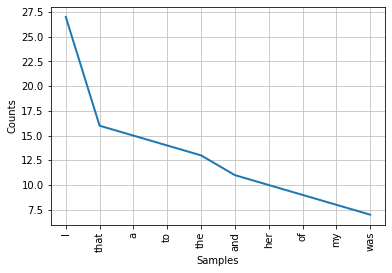

In [ ]:
fdist.plot(10)

In [ ]:
# Create a list of known stop words
stopwords = stopwords.words("english")

# Empty list to store clean words :
non_stop_words = []

# Fill the list with non stop words
for w in fox_crow_words:
    if w not in stopwords:
        non_stop_words.append(w)

# Plot the frequency of the cleaned words
fdist_no_stop = FreqDist(non_stop_words)
#Print 10 most common words
fdist_no_stop.most_common(10)

[('I', 27),
 ('Miss', 7),
 ('Crow', 7),
 ('could', 5),
 ('cheese', 4),
 ('beak', 4),
 ('eat', 3),
 ('say', 3),
 ('ever', 3),
 ('even', 3)]

This is the frequency distribution after removing Stop Words

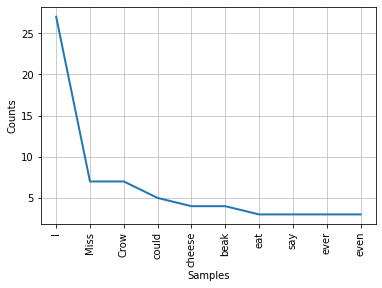

In [ ]:
fdist_no_stop.plot(10)